In [1]:
#数据的下载和预处理
import torch as t
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() #把ToPIL函数别称为show，方便后面查看图片

#第一次使用的话先下载
#预先规定好数据接收后转成什么格式
transform = transforms.Compose([
    transforms.ToTensor(),#转换成tensor
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = tv.datasets.CIFAR10(
                        root='/media/peilin/R:disk/Dataset/',
                        train=True,
                        download = True,
                        transform = transform
                        )

trainloader = t.utils.data.DataLoader(
                        trainset,
                        batch_size = 4,
                        shuffle = True
                        )

testset = tv.datasets.CIFAR10(
                        root='/media/peilin/R:disk/Dataset/',
                        train=False,
                        download = True,
                        transform = transform
                        )

testloader = t.utils.data.DataLoader(
                        trainset,
                        batch_size = 4,
                        shuffle = False
                        )

Files already downloaded and verified
Files already downloaded and verified


In [33]:
classes = ('大飞机','小汽车','小鸟','猫咪','小鹿',
          '小狗','蛤','大马','大轮船','大卡车')

#可以访问数据
(data,label) = trainset[10]
classes[label]


'小鹿'

In [3]:
#定义网络LeNet
import torch.nn as nn
import torch.nn.functional as Func

class LeNet(nn.Module):
    def __init__(self):
        #nn.module的子类必须在构造函数中执行父类的构造函数
        #下面的等价于nn.Module.__init__(self)
        super(LeNet,self).__init__()
        #卷基层'1'输入图片为单通道图片，‘6’为输出通道数，'5'表示卷积核5*5
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        #全链接层，y=wh+b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        #卷积->激活->池化 
        x = Func.max_pool2d(Func.relu(self.conv1(x)),(2,2))
        x = Func.max_pool2d(Func.relu(self.conv2(x)),2)
        #把x重新排列，默认-1
        x = x.view(x.size()[0],-1)
        x = Func.relu(self.fc1(x))
        x = Func.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
#定义损失函数和优化器
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.90)

In [ ]:
if t.cuda.is_available():
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    output = net(Variable(images))  
    loss = criterion(ouput,Variable(labels))
from torch.autograd import Variable
#训练网络
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):#其中0是起始位置
        #输入数据
        inputs,labels = data
        inputs,labels = Variable(inputs),Variable(labels)
        

        
        #梯度清零
        optimizer.zero_grad()
        
        #前传和反向传播
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        
        #参数更新
        optimizer.step()
        
        running_loss += loss.item()
        if i %2000 == 1999:
            print('[%d,%5d] loss :%.3f'\
                 %(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
print("完成训练")

实际标签:       大马       蛤      猫咪      小鸟


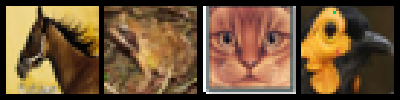

In [36]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print("实际标签:",''.join(\
                    '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images /2 -0.5)).resize((400,100))

In [37]:
outputs = net(Variable(images))
_,predict=t.max(outputs.data,1)
print("预测结果:",' '.join('%5s'\
                      % classes[predicted[j]] for j in range(4)))

预测结果:   大卡车    小鹿    小鸟    小鹿


In [23]:
#测准确率
correct = 0
total = 0
for data in testloader:
    images,labels = data
    output = net(Variable(images))
    #取输出可能性最大的一类
    numbers,predicted = t.max(outputs,1)
    total +=labels.size(0)
    correct +=(predicted == labels).sum().item()

print(correct)
print("测试得出的准确度为: %f  %%" % (100*correct/total))    

5023
测试得出的准确度为: 10.046000  %
